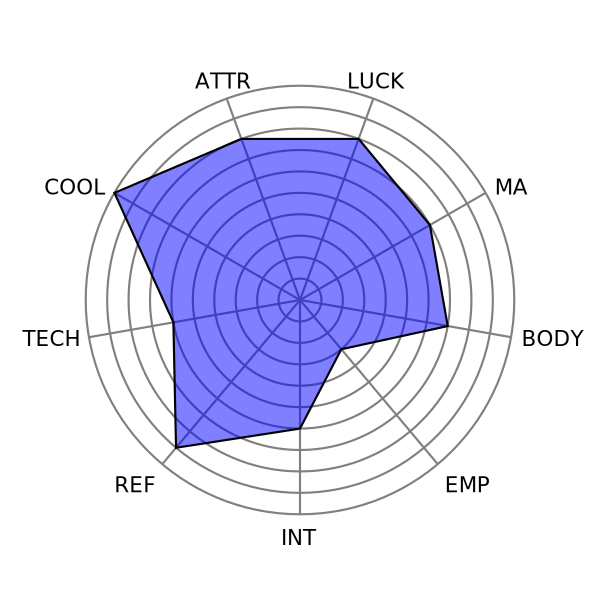

In [151]:
import numpy as np

PLOT_WD = 2800
PLOT_HT = 2800

CENTER = [PLOT_WD // 2, PLOT_HT // 2]

stat_l = np.random.randint(2, 11, 9)

stat_name = ["INT", "REF", "TECH", "COOL", "ATTR", "LUCK", "MA", "BODY", "EMP"]

svg_header = "<?xml version=\"1.0\" ?>\n" +\
            "<svg xmlns=\"http://www.w3.org/2000/svg\" xmlns:xlink=\"http://www.w3.org/1999/xlink\" \n" +\
            "width=\"600\" height=\"600\" " +\
            "viewBox=\"0 0 {} {}\" ".format(PLOT_WD, PLOT_HT) +\
            ">\n\n"
            
svg_footer = "\n\n</svg>\n"

def draw_radar(): 
    out = ""
    for i in range(10): 
        out += "\t<circle cx=\"{}\" cy=\"{}\" r=\"{}\" ".format(CENTER[0], CENTER[1], (i + 1) * 100)
        out += "stroke=\"gray\" stroke-width=\"10\" fill=\"none\" />\n"
    out += "\n"
    for i in range(9): 
        angle = np.radians(90 + (i * 40))
        x = CENTER[0] + (1000 * np.cos(angle))
        y = CENTER[1] + (1000 * np.sin(angle))
        out += "\t<path d=\"M {},{} L {},{}\" ".format(CENTER[0], CENTER[1], x, y)
        out += "stroke=\"gray\" stroke-width=\"10\" fill=\"none\" />\n"
    out += "\n"
    
    return out

def draw_stats(stats): 
    out = ""
    out += "<polygon points=\""
    for i in range(len(stats)): 
        angle = np.radians(90 + (i * 40))
        x = CENTER[0] + (stats[i] * 100 * np.cos(angle))
        y = CENTER[1] + (stats[i] * 100 * np.sin(angle))
        out += "{},{} ".format(x, y)
    out += "\" stroke=\"black\" stroke-width=\"10\" fill=\"blue\" fill-opacity=\"0.5\" />\n"    
    return out

def draw_label(): 
    out = ""
    for i in range(len(stat_name)): 
        angle = np.radians(90 + (i * 40))
        x = CENTER[0] + 1050 * np.cos(angle)
        y = CENTER[1] + 1050 * np.sin(angle)
        out += "\t<text x=\"{}\" y=\"{}\" ".format(x, y)
        out += "style=\"stroke: none; fill: black; font-size: 100; "
        if(i in {0, 4, 5}): 
            out += "text-anchor: middle; " 
        elif(i in {1, 2, 3}): 
            out += "text-anchor: end; "
        else: 
            out += "text-anchor: start; "
        if(i in {2, 3, 6, 7}): 
            out += "alignment-baseline: middle; "
        elif(i in {8, 0, 1}): 
            out += "alignment-baseline: hanging; " 
        else: 
            out += "alignment-baseline: baseline; "
        out += "\" >" 
        out += "{}".format(stat_name[i]) 
        out += "</text>\n"
    out += "\n"
    return out
    

file = open("test_svg.svg", "w") 

file.write(svg_header)
file.write(draw_radar())
file.write(draw_label())

file.write(svg_footer)
file.close()

def graph_stats(stats, name): 
    file = open("{}-stats.svg".format(name), "w")
    file.write(svg_header)
    file.write(draw_radar())
    file.write(draw_label())
    file.write(draw_stats(stats))
    file.write(svg_footer)
    file.close()
    img = (SVG("{}-stats.svg".format(name)))
    return img
    
graph_stats(stat_l, "test")

In [153]:

from IPython.core.display import SVG
from ipywidgets import widgets
from IPython.display import display, update_display, clear_output

name = "test"

foo = None

def on_t_button(b): 
    if(stat_l[0] < 10): 
        stat_l[0] += 1
    foo.update(graph_stats(stat_l, name))
    

def make_handler(stat): 
    return lambda change: gen_slid_hand(change, stat)

def gen_slid_hand(change, stat): 
    stat_l[stat] = change['new']
    with c_disp: 
        clear_output(wait = True)
        display(graph_stats(stat_l, name))
        

slid_l = list()

for i in range(len(stat_l)): 
    j = i
    spec_hand = make_handler(i)
    slid = widgets.IntSlider(value = stat_l[i], min = 2, max = 10, description = stat_name[i])
    slid.observe(spec_hand, names = 'value')
    slid_l.append(slid)

pts_left = widgets.IntProgress(value = 20, min = 0, max = 50, description = "Stat Points")

print(foo)
c_box = widgets.VBox(slid_l + [pts_left])
c_disp = widgets.Output()
with c_disp: 
    foo = display(graph_stats(stat_l, name), display_id = True)
view = widgets.HBox([c_box, c_disp])
display(view)

#display(*slid_l)
print(foo)




None


HBox(children=(VBox(children=(IntSlider(value=6, description='INT', max=10, min=2), IntSlider(value=9, description='REF', max=10, min=2), IntSlider(value=6, description='TECH', max=10, min=2), IntSlider(value=10, description='COOL', max=10, min=2), IntSlider(value=8, description='ATTR', max=10, min=2), IntSlider(value=8, description='LUCK', max=10, min=2), IntSlider(value=7, description='MA', max=10, min=2), IntSlider(value=7, description='BODY', max=10, min=2), IntSlider(value=3, description='EMP', max=10, min=2), IntProgress(value=20, description='Stat Points', max=50))), Output()))

<DisplayHandle display_id=3fc5caf86cff976dafc60e7b145fdad0>


In [139]:
print(foo)
print(foo.display_id)

<DisplayHandle display_id=ff4c296cec6b9fdd0865d4ffe6ca680f>
ff4c296cec6b9fdd0865d4ffe6ca680f


In [155]:
class Character: 
    
    stat_names = ["INT", "REF", "TECH", "COOL", "ATTR", "LUCK", "MA", "BODY", "EMP"]
    _init_stat_pool = 68
    
    def __init__(self, name): 
        self._stats = [2 for i in range(len(stat_names))]
        self._stat_pool = _init_stat_pool - (2 * len(stat_names))
        self._name = name
        
    def update_stat_name(stat_name, stat_value): 
        idx = _stats.index(stat_name)
        return update_stat(idx, stat_value)
        
    def update_stat(stat, stat_value): 
        if((stat_value > 10) or (stat_value < 2)): 
            return False
        if(stat_value - _stats[stat] > _stat_pool): 
            return False
        _stats[stat] = stat_value
        _update_stat_pool()
        return True
    
    def _update_stat_pool(): 
        pool = _init_stat_pool
        for i in _stats: 
            pool -= i
        _stat_pool = pool
        
    def get_stat_name(stat_name): 
        idx = stats.index(stat_name)
        return get_stat(idx)
        
    def get_stat(stat): 
        return _stats[stat]
        

In [ ]:
class CharacterPlot: 
    
    _PLOT_WD = 2800
    _PLOT_HT = 2800

    _CENTER = [PLOT_WD // 2, PLOT_HT // 2]
    _svg_header = "<?xml version=\"1.0\" ?>\n" +\
                "<svg xmlns=\"http://www.w3.org/2000/svg\" xmlns:xlink=\"http://www.w3.org/1999/xlink\" \n" +\
                "width=\"600\" height=\"600\" " +\
                "viewBox=\"0 0 {} {}\" ".format(PLOT_WD, PLOT_HT) +\
                ">\n\n"

    _svg_footer = "\n\n</svg>\n"

    
    def __init__(self, name, pt_name_l, pt_l): 
        _name = name
        _pt_name = pt_name_l
        _pt_l = pt_l